# PfDA Assignment 1 2023

## Problem statement:

For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python. We suggest you use the numpy.random package for this purpose.

Specifically, in this project you should:
- Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
- Investigate the types of variables involved, their likely distributions, and their relationships with each other.
- Synthesise/simulate a data set as closely matching their properties as possible.
- Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

Note that this project is about simulation – you must synthesise a data set. Some students may already have some real-world data sets in their own files. It is okay to base your synthesised data set on these should you wish (please reference it if you do), but the main task in this project is to create a synthesised data set. 

## Background

I have chosen to base my synthesised dataset on the passengers on board the RMS Titanic and the relationship between the various factors.  The original dataset has 12 variables but for the puropses of this assignment I am only going to look at a subset of these. 

The variables that I will include are;

- Sex
- Age
- Passenger Class
- Survived
- Siblings/Spouse onboard

## Investigate the types of variables involved, their likely distributions, and their relationships with each other

Having identified a real-world phenomenon to simulate, the next step is to investigate the types of variables involved, their likely distributions, and their relationships with each other. To do so I need data. 

## Types of Variables

<img src = variable_type_infographic.PNG alt = "Data Types Infographic">

A variable is a characteristic that can be measured and that can assume different values. Height, age, income, province or country of birth, grades obtained at school and type of housing are all examples of variables. Understanding the types of variables in a dataset is crucial for performing appropriate analyses and choosing suitable machine learning algorithms for prediction tasks. Different types of variables require different statistical methods and visualization techniques for analysis.  Variables may be classified into two main categories: categorical and numeric. Each category is then classified in two subcategories: nominal or ordinal for categorical variables, discrete or continuous for numeric variables. 

A categorical variable (also called qualitative variable) refers to a characteristic that can’t be quantifiable. Categorical variables can be either nominal or ordinal.

  - A nominal variable is one that describes a name, label or category without natural order. Sex and type of dwelling are examples of nominal variables.

  - An ordinal variable is a variable whose values are defined by an order relation between the different categories.

A numeric or quantative variable is a quantifiable characteristic whose values are numbers.  These variables can be either continous or discrete.

  - A continous variable is one that can assume an infinite number of real values within a given interval.  Continous variables can be further categorised as either interval or ratio variables with one of the key differences being that a ration has a defined zero point.

  - A discrete variable can assume only a finite number of real values within a given interval.

In this dataset we have both categorical and numerical variables.

  - Categorical: Survived, Sex and Embarked.  Ordinal: Pclass

  - Continous: Age, Fare.  Discrete: SibSp, Parch

## Loading Original Dataset

In [1]:
# Import modules necessary for this task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
# Read in the existing dataset from the online source.

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

df = pd.read_csv(url)

In [3]:
# Display the dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
# Print a summary of the numerical variables
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


## Exploring the original dataset

As mentioned above for this project I will only be looking at a subset of the original dataset.  Using the *loc* function in pandas I will create a new dataframe *df1* which only contains those variables in which I am interested and will attempt to recreate in a synthesised dataset.

In [5]:
# Create a new dataframe containing only those variables from the original data that I want to use.  Using 
# the dropna() function to remove those rows that contain null values.
df1 = df.loc[:,['Survived','Pclass','Sex','Age','SibSp']].dropna()
df1.head()

,Survived,Pclass,Sex,Age,SibSp
0,0,3,male,22.0,1
1,1,1,female,38.0,1
2,1,3,female,26.0,0
3,1,1,female,35.0,1
4,0,3,male,35.0,0


In [6]:
# As I used the dropna() function above my dataframe df1 should no longer contain any null values.
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
dtype: int64

In [26]:
# Calculate mean, median, and standard diviation.  
relevant_columns = ["Age", "Sex", "Pclass", "Survived", "SibSp"]

mean = df1[relevant_columns].mean()
median = df1[relevant_columns].median()
std_devs = df1[relevant_columns].std()

C:\Users\lgrealish\AppData\Local\Temp\ipykernel_10520\3502637487.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df1[relevant_columns].mean()
C:\Users\lgrealish\AppData\Local\Temp\ipykernel_10520\3502637487.py:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median = df1[relevant_columns].median()
C:\Users\lgrealish\AppData\Local\Temp\ipykernel_10520\3502637487.py:6: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying '

In [27]:
# Create a summary dataframe.
descriptive_stats = pd.DataFrame({
    "Mean": mean,
    "Median":median,
    "Standard Deviation": std_devs
})

# Display the descriptive statistics. We can then use these when creating our synthetic dataset.
print(descriptive_stats)

               Mean  Median  Standard Deviation
Age       29.699118    28.0           14.526497
Pclass     2.236695     2.0            0.838250
Survived   0.406162     0.0            0.491460
SibSp      0.512605     0.0            0.929783


The results of the above descriptive statistics (mean, median, standard deviation) can be used in the code for generating the synthetic dataset.

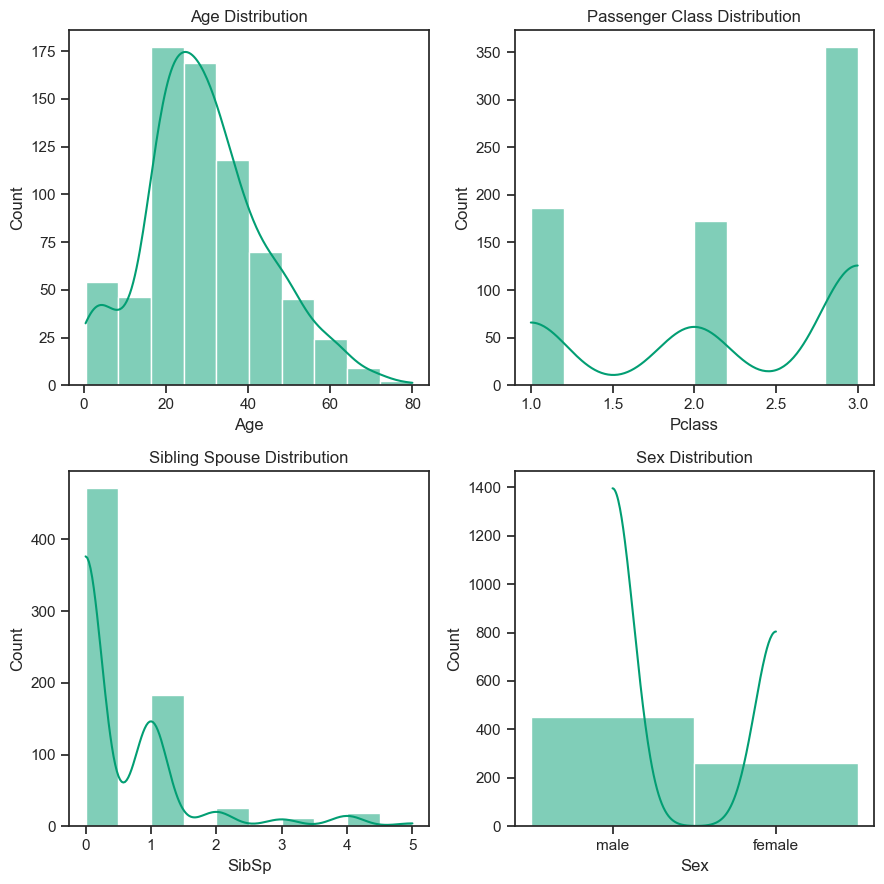

In [9]:
# set up the subplots, style and palette
sns.set(style="ticks", palette="colorblind")
f,axes=plt.subplots(2,2, figsize=(9,9))
# plot the distributions of each of the main variables.
sns.histplot(df1['Age'].dropna(), kde=True, ax=axes[0,0], bins=10, color="g");
# set axes title
axes[0,0].set_title("Age Distribution");
sns.histplot(df1['Pclass'].dropna(), kde=True, ax=axes[0,1], bins=10, color="g");
axes[0,1].set_title("Passenger Class Distribution");
sns.histplot(df1['SibSp'].dropna(), kde=True, ax=axes[1,0], bins=10, color="g");
axes[1,0].set_title("Sibling Spouse Distribution");
sns.histplot(df1['Sex'].dropna(), kde=True, ax=axes[1,1], bins=10, color="g");
axes[1,1].set_title("Sex Distribution");

plt.tight_layout();

From the above histplots we can visualise the distributions for each of the four variables.

**Age**: This appeasrs to follow a normal distribution with some positive skewness.

**Passenger Class**: Doesn't appear to follow any obvious distribution but there are substantially more passengers in 3rd class than in either of the pother classes.

**Siblings/Spouses**: The majority of passengers had no siblings or spouse onboard.

**Sex**: 

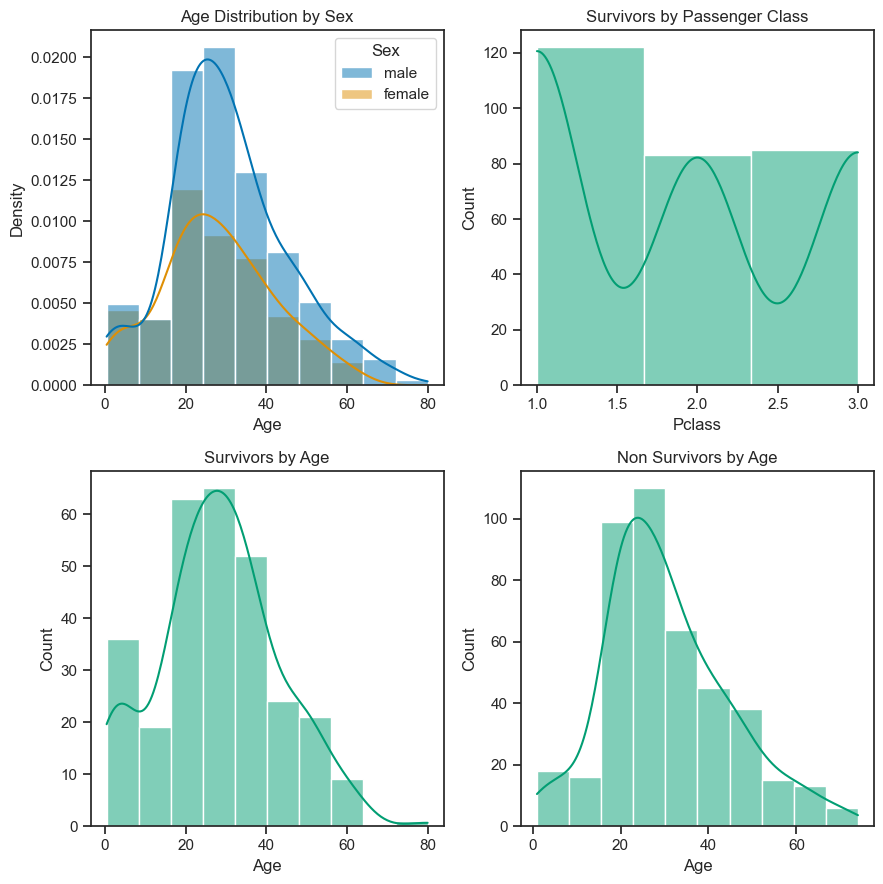

In [10]:
# set up the subplots, style and palette
sns.set(style="ticks", palette="colorblind")
f,axes=plt.subplots(2,2, figsize=(9,9))
# plot the distributions of each of the main variables.
sns.histplot(df1, x='Age', kde=True, stat="density", ax=axes[0,0], bins=10, hue='Sex');
# set axes title
axes[0,0].set_title("Age Distribution by Sex");
sns.histplot(df1[df1['Survived']==1]['Pclass'].dropna(), kde=True, ax=axes[0,1], bins=3, color="g");
axes[0,1].set_title("Survivors by Passenger Class");
sns.histplot(df1[df1['Survived']==1]['Age'].dropna(), kde=True, ax=axes[1,0], bins=10, color="g");
axes[1,0].set_title("Survivors by Age");
sns.histplot(df1[df1['Survived']==0]['Age'].dropna(), kde=True, ax=axes[1,1], bins=10, color="g");
axes[1,1].set_title("Non Survivors by Age");

plt.tight_layout();

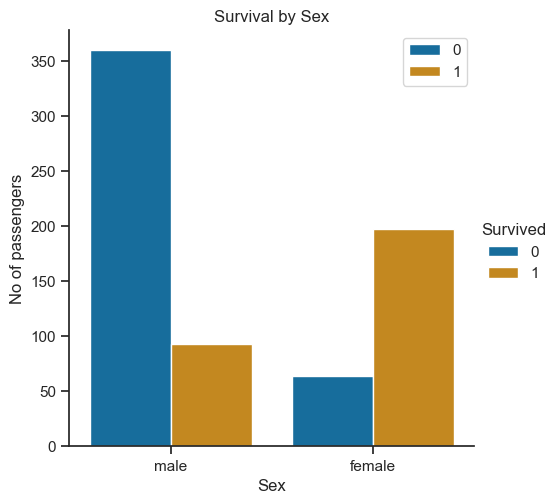

In [11]:
sns.catplot(x="Sex", hue="Survived",
kind="count", data=df1)
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('No of passengers')
plt.legend();

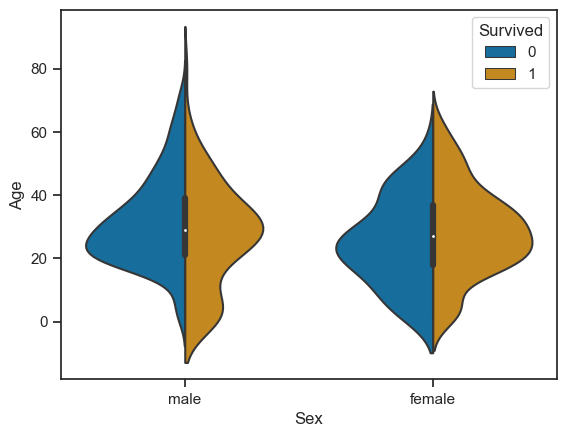

In [12]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived", 
data = df1, split = True);

## Observations from original data

- Females had a significantly higher chance of survival than males.

- Younger passengers had a higher survival rate, while the elderly had lower rates.

- The survival rate of first class passengers was higher than that of those passengers in second or third class.  This indicates that socio-economic status played a role in survival chances.

- The distribution of age for those onboard appears to be a somewhat normal distribution.

# Generate synthetic dataset

In [28]:
# Number of samples in the dataset
num_samples = 400

# By adding the following criteria I can "weight" the distribution of males/females, survived/not survived 
# and passenger class to more accurately reflect the actual data in the original dataset.
# https://stackoverflow.com/questions/10803135/weighted-choice-short-and-simple
Sex_elements = ['male', 'female']
weights_sex = [0.6, 0.4]

Survived_elements = ['0', '1']
weights_survived = [0.6, 0.4]

PassengerClass_elements = ['1', '2', '3']
weights_passengerclass = [0.25, 0.25, 0.5]

# Generate synthetic features
sex = random.choices(Sex_elements, weights_sex, k=num_samples);
age = np.random.normal(loc=30, scale=10, size=num_samples).astype(int);
passenger_class = random.choices(PassengerClass_elements, weights_passengerclass, k=num_samples)
survived = random.choices(Survived_elements, weights_survived, k=num_samples)
#sibling_spouse = np.random.randint(low=0, high=5, size =num_samples)
sibling_spouse = np.random.lognormal(mean=0.512605, sigma=0.929783, size=num_samples).astype(int)

# Create a DataFrame to store the synthetic dataset
synthetic_data = pd.DataFrame({
    'Sex': sex,
    'Age': age,
    'Class': passenger_class,
    'Survived': survived,
    'Sibling/Spouse' : sibling_spouse})


# Save the synthetic dataset to a CSV file
synthetic_data.to_csv('synthetic_data.csv', index=False)


In [14]:
# Display the first few rows of the synthetic dataset
print(synthetic_data.head())

      Sex  Age Class Survived  Sibling/Spouse
0    male   21     2        0               3
1    male   24     3        1               2
2  female   24     3        0               1
3    male   19     3        0               4
4  female   36     3        0               0


In [22]:
# Display the dataset information
print(synthetic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sex             400 non-null    object
 1   Age             400 non-null    int32 
 2   Class           400 non-null    object
 3   Survived        400 non-null    object
 4   Sibling/Spouse  400 non-null    int32 
dtypes: int32(2), object(3)
memory usage: 12.6+ KB
None


In [23]:
# Print a summary of the numerical variables
print(synthetic_data.describe())

              Age  Sibling/Spouse
count  400.000000      400.000000
mean    29.447500        2.030000
std     10.226862        1.403219
min      4.000000        0.000000
25%     22.000000        1.000000
50%     29.000000        2.000000
75%     36.000000        3.000000
max     58.000000        4.000000


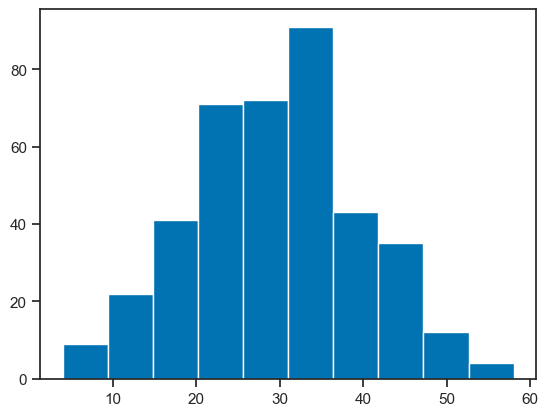

In [24]:
plt.hist(synthetic_data['Age'])
plt.show;

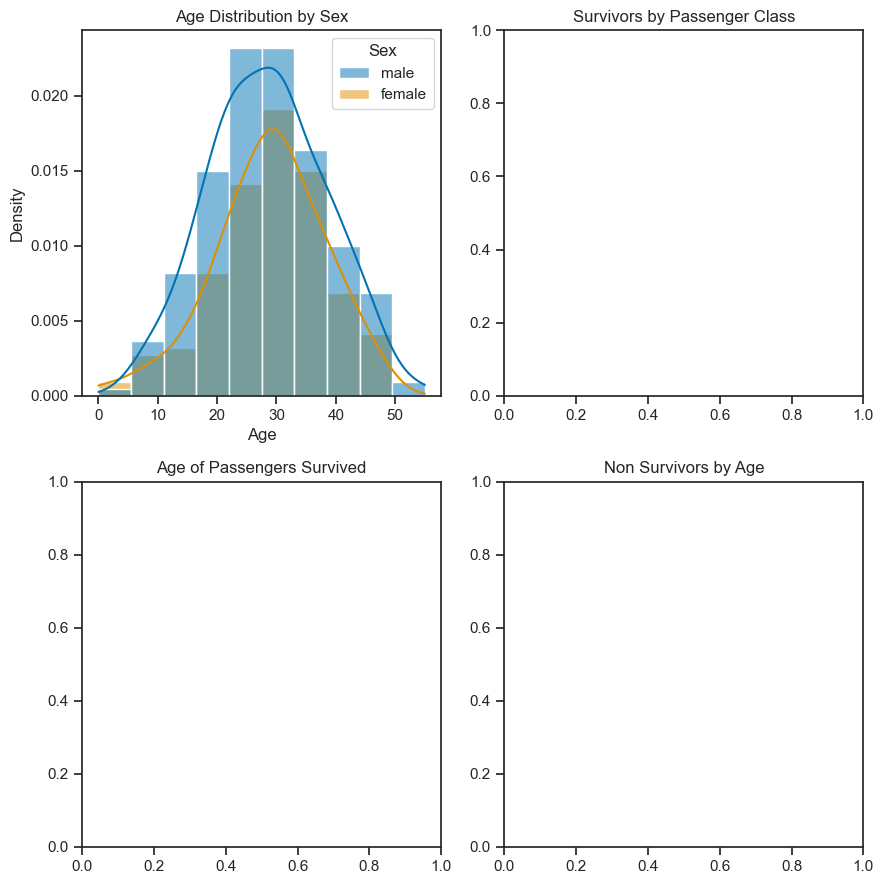

In [18]:
# set up the subplots, style and palette
sns.set(style="ticks", palette="colorblind")
f,axes=plt.subplots(2,2, figsize=(9,9))
# plot the distributions of each of the main variables.
sns.histplot(synthetic_data, x='Age', kde=True, stat="density", ax=axes[0,0], bins=10, hue='Sex');
# set axes title
axes[0,0].set_title("Age Distribution by Sex");
sns.histplot(synthetic_data[synthetic_data['Survived']==1]['Class'].dropna(), kde=True, ax=axes[0,1], bins=10, color="g");
axes[0,1].set_title("Survivors by Passenger Class");
sns.histplot(synthetic_data[synthetic_data['Survived']==1]['Age'].dropna(), kde=True, ax=axes[1,0], bins=10, color="g");
axes[1,0].set_title("Age of Passengers Survived");
sns.histplot(synthetic_data[synthetic_data['Survived']==0]['Age'].dropna(), kde=True, ax=axes[1,1], bins=10, color="g");
axes[1,1].set_title("Non Survivors by Age");

plt.tight_layout();

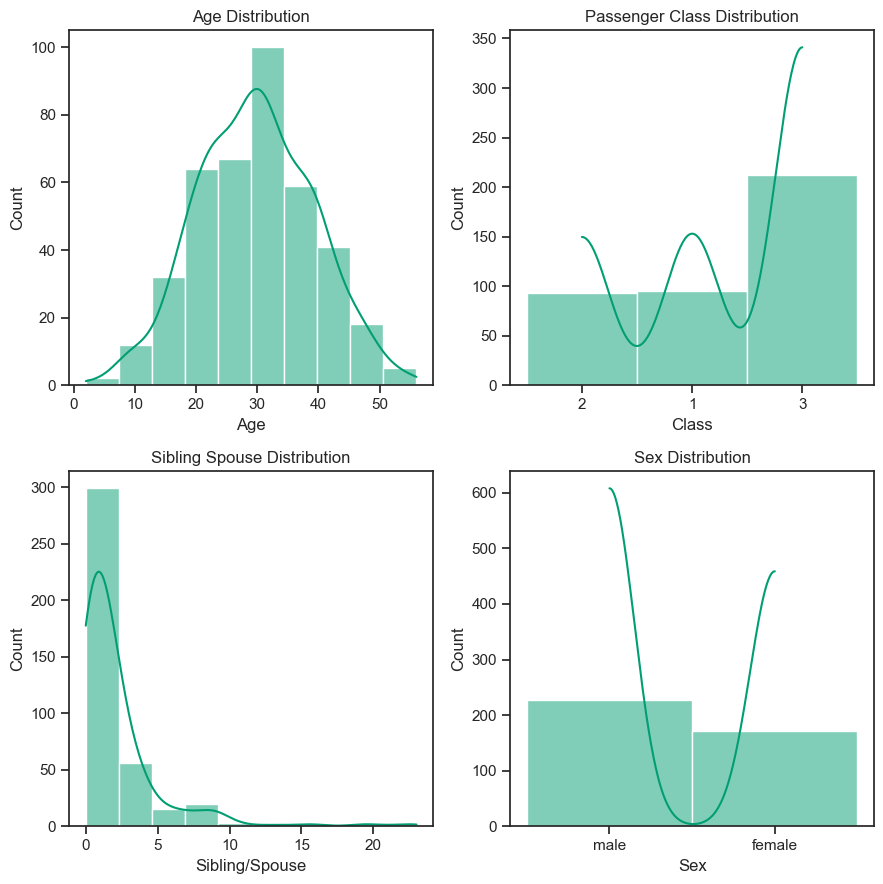

In [29]:
# set up the subplots, style and palette
sns.set(style="ticks", palette="colorblind")
f,axes=plt.subplots(2,2, figsize=(9,9))
# plot the distributions of each of the main variables.
sns.histplot(synthetic_data['Age'].dropna(), kde=True, ax=axes[0,0], bins=10, color="g");
# set axes title
axes[0,0].set_title("Age Distribution");
sns.histplot(synthetic_data['Class'].dropna(), kde=True, ax=axes[0,1], bins=10, color="g");
axes[0,1].set_title("Passenger Class Distribution");
sns.histplot(synthetic_data['Sibling/Spouse'].dropna(), kde=True, ax=axes[1,0], bins=10, color="g");
axes[1,0].set_title("Sibling Spouse Distribution");
sns.histplot(synthetic_data['Sex'].dropna(), kde=True, ax=axes[1,1], bins=10, color="g");
axes[1,1].set_title("Sex Distribution");

plt.tight_layout();